In [201]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [202]:
data = pd.read_excel('tmb-1794-data_12-05-22.xlsx')
meta = pd.read_excel('tmb-1794_metadata.xlsx', index_col='beer')

## Tcheque mon Bike (TMB) beer specs

In [203]:
meta

,lot,location,yeast_type,yeast_gen,yeast_lot,start_date
beer,,,,,,
TMB,1794,FV10,Boh-II,0,22585,29/11/2022


## TMB fermentation kinetics

In [204]:
# count days from brewday
data['yeast_activity'] = data['yeast_activity'].astype(bool)
start = pd.to_datetime('2022-11-29')
data['days'] = (data['date'] - start) / pd.to_timedelta(1, unit='D')
data = data[['date','days','gravity','ph','temperature','yeast_count','yeast_viability','yeast_activity', 'Pitch']]
data.drop('date', axis=1).set_index('days')

,gravity,ph,temperature,yeast_count,yeast_viability,yeast_activity,Pitch
days,,,,,,,
0.0,12.3,5.28,NaN,NaN,NaN,False,True
0.5,12.3,5.19,10.0,NaN,NaN,False,False
1.0,NaN,5.15,10.5,NaN,NaN,False,False
2.0,NaN,5.11,11.0,1650000.0,9.4,False,True
3.0,NaN,4.83,11.8,17550000.0,49.3,True,False
4.0,NaN,NaN,NaN,NaN,NaN,True,False
5.0,NaN,NaN,NaN,NaN,NaN,True,False
6.0,7.5,4.45,10.1,NaN,NaN,True,False


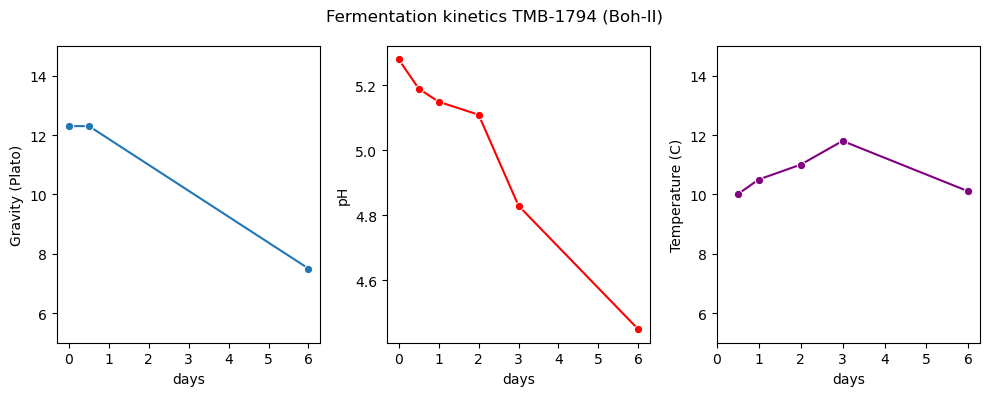

In [205]:
# plot fermentation chemisty
fig,axes = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Fermentation kinetics TMB-1794 (Boh-II)')

sns.lineplot(data=data, ax=axes[0], x='days', y='gravity', marker='o')
axes[0].set(ylabel='Gravity (Plato)', ylim=([5,15]), xticks=(np.arange(0, 7, step=1)))
sns.lineplot(data=data, ax=axes[1], x='days', y='ph', marker='o', color='red',)
axes[1].set(ylabel='pH',xticks=(np.arange(0, 7, step=1)))
sns.lineplot(data=data, ax=axes[2], x='days', y='temperature', marker='o', color='purple')
axes[2].set(ylabel='Temperature (C)', xticks=(np.arange(0, 7, step=1)), ylim=([5,15]))

plt.tight_layout()

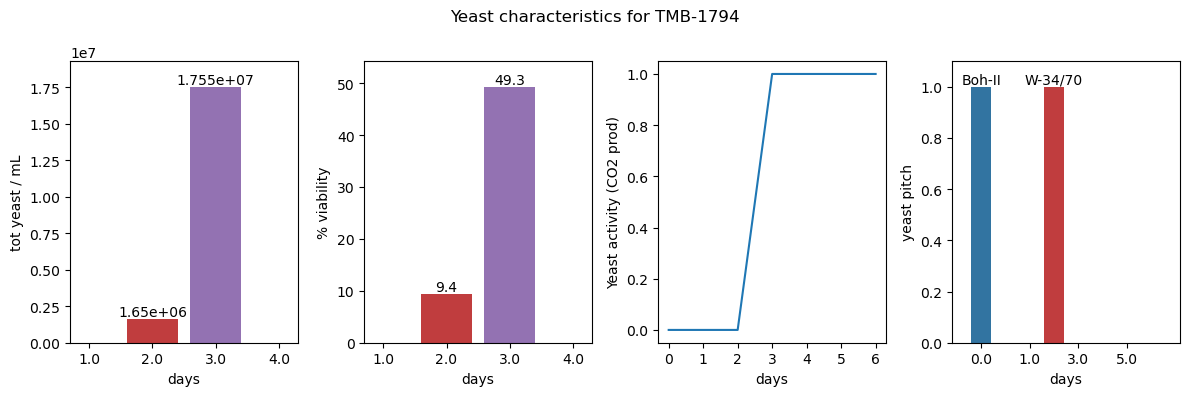

In [206]:
# plot yeast characteristics
fig,ax = plt.subplots(1,4, figsize=(12,4))
fig.suptitle('Yeast characteristics for TMB-1794')

sns.barplot(data=data, ax=ax[0], x='days', y='yeast_count')
ax[0].set(ylabel='tot yeast / mL')
for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=10)
ax[0].margins(x=0.5, y=0.1)

sns.barplot(data=data, ax=ax[1], x='days', y='yeast_viability')
ax[1].set(ylabel='% viability')
for i in ax[1].containers:
    ax[1].bar_label(i,fontsize=10)
ax[1].margins(x=0.5, y=0.1)

sns.lineplot(data=data, ax=ax[2], x='days', y='yeast_activity')
ax[2].set(xticks=(np.arange(0, 7, step=1)), ylabel='Yeast activity (CO2 prod)')

sns.barplot(data=data, ax=ax[3], x='days', y='Pitch')
ax[3].set(xticks=(np.arange(0, 7, step=2)), ylabel='yeast pitch')
for i in ax[3].containers:
    ax[3].bar_label(i,fontsize=10, labels=['Boh-II','','','W-34/70','','','',''])
plt.margins(0.1,0.1)

plt.tight_layout()